In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx
/kaggle/input/widsdatathon2025/Data Dictionary.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_CATEGORICAL_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN_OLD/TRAIN_QUANTITATIVE_METADATA.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx
/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv
/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx
/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx


### Loading the dataset

In [2]:
# Set the path
BASE_PATH = "/kaggle/input/widsdatathon2025/TRAIN_NEW"

# Load files
targets = pd.read_excel(f"{BASE_PATH}/TRAINING_SOLUTIONS.xlsx")
fmri = pd.read_csv(f"{BASE_PATH}/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
categorical = pd.read_excel(f"{BASE_PATH}/TRAIN_CATEGORICAL_METADATA_new.xlsx")
quantitative = pd.read_excel(f"{BASE_PATH}/TRAIN_QUANTITATIVE_METADATA_new.xlsx")

# Preview shapes
print("Targets:", targets.shape)
print("fMRI:", fmri.shape)
print("Categorical:", categorical.shape)
print("Quantitative:", quantitative.shape)


Targets: (1213, 3)
fMRI: (1213, 19901)
Categorical: (1213, 10)
Quantitative: (1213, 19)


In [3]:
# View column names
print("Targets Columns:", targets.columns.tolist())
print('____________________________________________________________')


# Preview a few rows
print(targets.head())


Targets Columns: ['participant_id', 'ADHD_Outcome', 'Sex_F']
____________________________________________________________
  participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1


In [4]:
print("fMRI Columns:", fmri.columns[:5].tolist())  # show a few to get the idea
print('____________________________________________________________')
print(fmri.head())


fMRI Columns: ['participant_id', '0throw_1thcolumn', '0throw_2thcolumn', '0throw_3thcolumn', '0throw_4thcolumn']
____________________________________________________________
  participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.222930          0.527903          0.429966   
1   WHWymJu6zNZi          0.614765          0.577255          0.496127   
2   4PAQp1M6EyAo         -0.116833          0.458408          0.260703   
3   obEacy4Of68I          0.199688          0.752714          0.658283   
4   s7WzzDcmDOhF          0.227321          0.613268          0.621447   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.060457          0.566489          0.315342          0.508408   
1          0.496606          0.404686          0.439724          0.122590   
2          0.639031          0.769337          0.442528          0.637110   
3          0.575096          0.692867          0.645789          0.522750

In [5]:
print("Categorical Columns:", categorical.columns.tolist())
print('____________________________________________________________')
print(categorical.head())

Categorical Columns: ['participant_id', 'Basic_Demos_Enroll_Year', 'Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race', 'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ']
____________________________________________________________
  participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   00aIpNTbG5uh                     2019                       4   
1   00fV0OyyoLfw                     2017                       1   
2   04X1eiS79T4B                     2017                       1   
3   05ocQutkURd6                     2018                       1   
4   06YUNBA9ZRLq                     2018                       1   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               1.0                          0.0   
1                               0.0                          9.0   
2                            

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [6]:
print("Quantitative Columns:", quantitative.columns.tolist())
print('____________________________________________________________')
print(quantitative.head())

Quantitative Columns: ['participant_id', 'EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Peer_Problems', 'SDQ_SDQ_Prosocial', 'MRI_Track_Age_at_Scan']
____________________________________________________________
  participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   00aIpNTbG5uh         100.00                  13.0             3.0   
1   00fV0OyyoLfw          92.27                  14.0             3.0   
2   04X1eiS79T4B          86.67                  14.0             3.0   
3   05ocQutkURd6          93.34                  14.0             3.0   
4   06YUNBA9ZRLq           0.00                  14.0             8.0   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


### Merge All Datasets into One Master Table

In [7]:
# Merge all datasets on participant_id
df = targets.merge(fmri, on="participant_id")
df = df.merge(categorical, on="participant_id")
df = df.merge(quantitative, on="participant_id")

# Confirm final shape
print("Merged dataset shape:", df.shape)
print("Columns preview:", df.columns[:10])


Merged dataset shape: (1213, 19930)
Columns preview: Index(['participant_id', 'ADHD_Outcome', 'Sex_F', '0throw_1thcolumn',
       '0throw_2thcolumn', '0throw_3thcolumn', '0throw_4thcolumn',
       '0throw_5thcolumn', '0throw_6thcolumn', '0throw_7thcolumn'],
      dtype='object')


## Data Cleaning & Preprocessing

Missing Value Check

In [8]:
# Check for missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Columns with missing values:\n", missing)


Columns with missing values:
 MRI_Track_Age_at_Scan               360
Barratt_Barratt_P2_Occ              222
Barratt_Barratt_P2_Edu              198
PreInt_Demos_Fam_Child_Race          54
PreInt_Demos_Fam_Child_Ethnicity     43
Barratt_Barratt_P1_Occ               31
ColorVision_CV_Score                 23
Barratt_Barratt_P1_Edu               15
EHQ_EHQ_Total                        13
APQ_P_APQ_P_PM                       12
APQ_P_APQ_P_CP                       12
APQ_P_APQ_P_INV                      12
APQ_P_APQ_P_ID                       12
APQ_P_APQ_P_OPD                      12
APQ_P_APQ_P_PP                       12
SDQ_SDQ_Difficulties_Total            9
SDQ_SDQ_Conduct_Problems              9
SDQ_SDQ_Hyperactivity                 9
SDQ_SDQ_Emotional_Problems            9
SDQ_SDQ_Generating_Impact             9
SDQ_SDQ_Externalizing                 9
SDQ_SDQ_Peer_Problems                 9
SDQ_SDQ_Internalizing                 9
SDQ_SDQ_Prosocial                     9
MRI_Track_

These are relatively high missing rates and may need special treatment.

In [9]:
from sklearn.impute import SimpleImputer

# Define metadata column groups (excluding participant_id)
quantitative_cols = quantitative.columns.drop("participant_id").tolist()
categorical_cols = categorical.columns.drop("participant_id").tolist()

# Impute quantitative features (use median)
quant_imputer = SimpleImputer(strategy="median")
df[quantitative_cols] = quant_imputer.fit_transform(df[quantitative_cols])

# Impute categorical features (use mode)
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [10]:
# Recreate column groups (excluding participant_id)
quantitative_cols = quantitative.columns.drop("participant_id").tolist()
categorical_cols = categorical.columns.drop("participant_id").tolist()


In [11]:
missing = df.isnull().sum()
print("Remaining missing values:\n", missing[missing > 0].sort_values(ascending=False))


Remaining missing values:
 Series([], dtype: int64)


In [12]:
from sklearn.impute import SimpleImputer

# Median for quantitative features
quant_imputer = SimpleImputer(strategy="median")
df[quantitative_cols] = quant_imputer.fit_transform(df[quantitative_cols])

# Mode for categorical features
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])


In [13]:
missing_after = df.isnull().sum()
print("Missing after imputation:\n", missing_after[missing_after > 0])


Missing after imputation:
 Series([], dtype: int64)


### Encode Categorical Features

In [14]:
# One-hot encode the categorical columns only
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check how the shape has changed
print("Original shape:", df.shape)
print("Encoded shape :", df_encoded.shape)


Original shape: (1213, 19930)
Encoded shape : (1213, 19974)


Separate Inputs and Outputs

In [15]:
# Define target columns
target_cols = ['ADHD_Outcome', 'Sex_F']

# Define feature columns: exclude participant_id + targets
feature_cols = [col for col in df_encoded.columns if col not in ['participant_id'] + target_cols]

# Final feature and target matrices
X = df_encoded[feature_cols]
y = df_encoded[target_cols]

print("Feature matrix shape:", X.shape)
print("Target matrix shape :", y.shape)


Feature matrix shape: (1213, 19971)
Target matrix shape : (1213, 2)


###  Feature Space Optimization

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd
import numpy as np


Solution 1 - PCA on fMRI Only

In [18]:
# 1. Isolate fMRI and metadata features
fmri_cols = [col for col in X.columns if 'throw_' in col]
meta_cols = [col for col in X.columns if col not in fmri_cols]

# 2. PCA on scaled fMRI features
scaler = StandardScaler()
X_fmri_scaled = scaler.fit_transform(X[fmri_cols])
pca = PCA(n_components=100, random_state=42)
X_fmri_pca = pca.fit_transform(X_fmri_scaled)
X_fmri_pca_df = pd.DataFrame(X_fmri_pca, index=X.index, columns=[f'fmri_pca_{i}' for i in range(100)])

# 3. Combine with metadata
X_A = pd.concat([X_fmri_pca_df, X[meta_cols]], axis=1)


Solution 2 - SelectKBest on All Features

In [19]:
# Use mutual information on multi-label targets separately
skb = SelectKBest(score_func=mutual_info_classif, k=300)  # pick top 300 features

# Fit on ADHD (you can experiment using both or averaging scores)
skb.fit(X, y['ADHD_Outcome'])
X_B = skb.transform(X)
X_B = pd.DataFrame(X_B, index=X.index)


Solution 3 - PCA on fMRI + SelectKBest on Combined Set

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import pandas as pd

# Step 1: Identify columns
fmri_cols = [col for col in X.columns if 'throw_' in col]
meta_cols = [col for col in X.columns if col not in fmri_cols]

# Step 2: PCA on scaled fMRI features
scaler = StandardScaler()
X_fmri_scaled = scaler.fit_transform(X[fmri_cols])

pca = PCA(n_components=100, random_state=42)
X_fmri_pca = pca.fit_transform(X_fmri_scaled)

# Convert PCA output to DataFrame
X_fmri_pca_df = pd.DataFrame(X_fmri_pca, index=X.index, columns=[f'fmri_pca_{i}' for i in range(100)])

# Step 3: Combine with metadata
X_combo = pd.concat([X_fmri_pca_df, X[meta_cols]], axis=1)

# Step 4: Select top 100 features from combo
skb_combo = SelectKBest(score_func=mutual_info_classif, k=100)
skb_combo.fit(X_combo, y['ADHD_Outcome'])
X_C = skb_combo.transform(X_combo)
X_C = pd.DataFrame(X_C, index=X.index)


Evaluation function

In [31]:
def evaluate_model(X_input, y, label):
    X_train, X_test, y_train, y_test = train_test_split(
        X_input, y, test_size=0.2, random_state=42, stratify=y['ADHD_Outcome']
    )

    clf = MultiOutputClassifier(RandomForestClassifier(random_state=42))
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\n🔹 {label} — Model Performance")
    print("ADHD:")
    print(classification_report(y_test['ADHD_Outcome'], y_pred[:, 0]))
    print("Sex (Female):")
    print(classification_report(y_test['Sex_F'], y_pred[:, 1]))


In [32]:
evaluate_model(X_A, y, "Option A: PCA on fMRI only")
evaluate_model(X_B, y, "Option B: SelectKBest on All Features")
evaluate_model(X_C, y, "Option C: PCA + SelectKBest (Top 100)")



🔹 Option A: PCA on fMRI only — Model Performance
ADHD:
              precision    recall  f1-score   support

           0       0.76      0.48      0.59        77
           1       0.79      0.93      0.86       166

    accuracy                           0.79       243
   macro avg       0.77      0.70      0.72       243
weighted avg       0.78      0.79      0.77       243

Sex (Female):
              precision    recall  f1-score   support

           0       0.66      1.00      0.79       158
           1       1.00      0.02      0.05        85

    accuracy                           0.66       243
   macro avg       0.83      0.51      0.42       243
weighted avg       0.78      0.66      0.53       243


🔹 Option B: SelectKBest on All Features — Model Performance
ADHD:
              precision    recall  f1-score   support

           0       0.77      0.48      0.59        77
           1       0.79      0.93      0.86       166

    accuracy                           0.79  

    Very low recall for class 1 (female) across all models, but:

        Option A: recall = 0.02

        Option B: recall = 0.01

        Option C: recall = 0.08

    Option C offers the best hope for improving sex classification



In [34]:
# ADHD distribution
print("ADHD class distribution:")
print(y['ADHD_Outcome'].value_counts())
print(y['ADHD_Outcome'].value_counts(normalize=True).round(2))


ADHD class distribution:
ADHD_Outcome
1    831
0    382
Name: count, dtype: int64
ADHD_Outcome
1    0.69
0    0.31
Name: proportion, dtype: float64


In [35]:
# Sex distribution
print("\nSex (Female = 1) class distribution:")
print(y['Sex_F'].value_counts())
print(y['Sex_F'].value_counts(normalize=True).round(2))


Sex (Female = 1) class distribution:
Sex_F
0    797
1    416
Name: count, dtype: int64
Sex_F
0    0.66
1    0.34
Name: proportion, dtype: float64


Handle Class Imbalance in XGBoost

In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_C, y, test_size=0.2, random_state=42, stratify=y['ADHD_Outcome']
)

# Calculate scale_pos_weight
adhd_weight = y_train['ADHD_Outcome'].value_counts()[0] / y_train['ADHD_Outcome'].value_counts()[1]
sex_weight = y_train['Sex_F'].value_counts()[0] / y_train['Sex_F'].value_counts()[1]

# Define XGBoost models with imbalance adjustment
xgb_adhd = XGBClassifier(scale_pos_weight=adhd_weight, eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_sex = XGBClassifier(scale_pos_weight=sex_weight, eval_metric='logloss', use_label_encoder=False, random_state=42)

# Train models
xgb_adhd.fit(X_train, y_train['ADHD_Outcome'])
xgb_sex.fit(X_train, y_train['Sex_F'])

# Predict
y_pred_adhd = xgb_adhd.predict(X_test)
y_pred_sex = xgb_sex.predict(X_test)

# Evaluate
print("📊 ADHD Classification Report (XGBoost):")
print(classification_report(y_test['ADHD_Outcome'], y_pred_adhd))

print("📊 Sex Classification Report (XGBoost):")
print(classification_report(y_test['Sex_F'], y_pred_sex))


📊 ADHD Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.68      0.56      0.61        77
           1       0.81      0.88      0.84       166

    accuracy                           0.78       243
   macro avg       0.75      0.72      0.73       243
weighted avg       0.77      0.78      0.77       243

📊 Sex Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       158
           1       0.46      0.27      0.34        85

    accuracy                           0.63       243
   macro avg       0.57      0.55      0.54       243
weighted avg       0.60      0.63      0.60       243



### Define Hyperparameter Spaces

RandomizedSearchCV

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBClassifier

random_grid = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 6)
}

xgb_base = XGBClassifier(
    scale_pos_weight=adhd_weight,  # from earlier calculation
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=random_grid,
    n_iter=25,
    scoring='f1',  # optimize for ADHD class 1
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)


In [39]:
random_search.fit(X_train, y_train['ADHD_Outcome'])


Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5594d24c40>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f559613bc70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f559613beb0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f559613bdf0>},
                   random_state=42, scoring='f1', verbose=1)

GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3]
}

grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)


In [41]:
grid_search.fit(X_train, y_train['ADHD_Outcome'])


Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [4, 6, 8],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [43]:
print("Best params (Randomized):", random_search.best_params_)
print("Best F1 (Randomized):", random_search.best_score_)

print('--------------------------------------')
print("Best params (Grid):", grid_search.best_params_)
print("Best F1 (Grid):", grid_search.best_score_)


Best params (Randomized): {'colsample_bytree': 0.610167650697638, 'learning_rate': 0.042367428097991336, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 151, 'subsample': 0.8253102287905535}
Best F1 (Randomized): 0.8465579191559639
--------------------------------------
Best params (Grid): {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Best F1 (Grid): 0.8521261462488966


### Tuning Sex_F with XGBoost

In [45]:
from sklearn.model_selection import train_test_split

X_train_sex, X_test_sex, y_train_sex, y_test_sex = train_test_split(
    X_C, y['Sex_F'], test_size=0.2, random_state=42, stratify=y['Sex_F']
)

# Handle imbalance
sex_weight = y_train_sex.value_counts()[0] / y_train_sex.value_counts()[1]


In [46]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Define search space
sex_random_grid = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 6)
}

# Base model
xgb_sex_base = XGBClassifier(
    scale_pos_weight=sex_weight,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Randomized search
sex_random_search = RandomizedSearchCV(
    estimator=xgb_sex_base,
    param_distributions=sex_random_grid,
    n_iter=25,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit
sex_random_search.fit(X_train_sex, y_train_sex)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5594d4a530>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f55949e7580>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f5594d4a470>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f55949e62c0>},
                   random_state=42, scoring='f1', verbose=1)

In [47]:
from sklearn.model_selection import GridSearchCV

# Smaller focused grid
sex_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3]
}

# Grid search
sex_grid_search = GridSearchCV(
    estimator=xgb_sex_base,
    param_grid=sex_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit
sex_grid_search.fit(X_train_sex, y_train_sex)


Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [4, 6, 8],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [48]:
from sklearn.metrics import classification_report

# Best from Randomized
best_sex_random = sex_random_search.best_estimator_
y_pred_random = best_sex_random.predict(X_test_sex)

print("📊 Sex Model (RandomizedSearchCV):")
print(classification_report(y_test_sex, y_pred_random))

# Best from Grid
best_sex_grid = sex_grid_search.best_estimator_
y_pred_grid = best_sex_grid.predict(X_test_sex)

print("📊 Sex Model (GridSearchCV):")
print(classification_report(y_test_sex, y_pred_grid))


📊 Sex Model (RandomizedSearchCV):
              precision    recall  f1-score   support

           0       0.72      0.78      0.74       160
           1       0.49      0.41      0.44        83

    accuracy                           0.65       243
   macro avg       0.60      0.59      0.59       243
weighted avg       0.64      0.65      0.64       243

📊 Sex Model (GridSearchCV):
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       160
           1       0.47      0.43      0.45        83

    accuracy                           0.64       243
   macro avg       0.60      0.59      0.59       243
weighted avg       0.63      0.64      0.64       243



## SHAP (SHapley Additive exPlanations)

“Which features are most responsible for predicting ADHD_Outcome or Sex_F, and how?”

In [49]:
!pip install shap


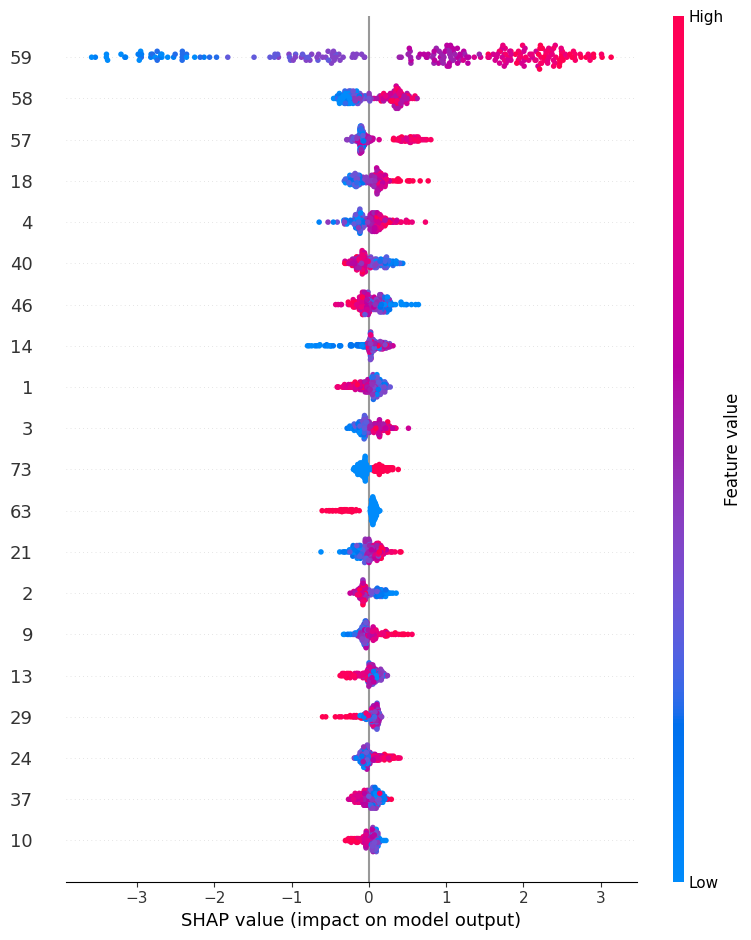

In [50]:
import shap
import matplotlib.pyplot as plt

# Load explainer
explainer = shap.Explainer(grid_search.best_estimator_)  # for ADHD
shap_values = explainer(X_test)

# Summary plot: feature importance
shap.summary_plot(shap_values, X_test, max_display=20)


Interpret PCA Features (e.g., Component 59)

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_fmri_scaled = scaler.fit_transform(X[fmri_cols])

pca = PCA(n_components=100, random_state=42)
X_fmri_pca = pca.fit_transform(X_fmri_scaled)


In [52]:
import numpy as np
import pandas as pd

# Component 59 (SHAP top feature)
component_index = 59

# Get the loadings for this component
loadings = pca.components_[component_index]

# Map to original fMRI columns
loading_df = pd.DataFrame({
    'feature': fmri_cols,
    'loading': loadings
})

# Sort by absolute value (strongest influence)
top_features = loading_df.reindex(loading_df.loading.abs().sort_values(ascending=False).index)

# Display top 10 original brain features for this PCA component
print(top_features.head(10))


                    feature   loading
1375      7throw_11thcolumn -0.027181
3422    17throw_193thcolumn  0.026724
9217    53throw_102thcolumn  0.026349
18321  143throw_161thcolumn -0.026210
15205  102throw_161thcolumn  0.025599
18315  143throw_155thcolumn  0.025539
15532  106throw_110thcolumn -0.025526
7418    41throw_121thcolumn  0.025522
1474     7throw_110thcolumn -0.025395
4869     26throw_47thcolumn -0.025388


Each row corresponds to a functional connection between two brain regions, like:

    Region 7 ↔️ Region 11 had strong weight in PCA component 59

So, PCA component 59 — which your model heavily relies on for predicting ADHD — is shaped significantly by:

    Frontal/parietal-temporal (if you know the actual brain parcellation used)

    Mid- and high-level cross-region connections (e.g., 143↔161, 102↔161)

### SHAP Plot for Sex_F Model

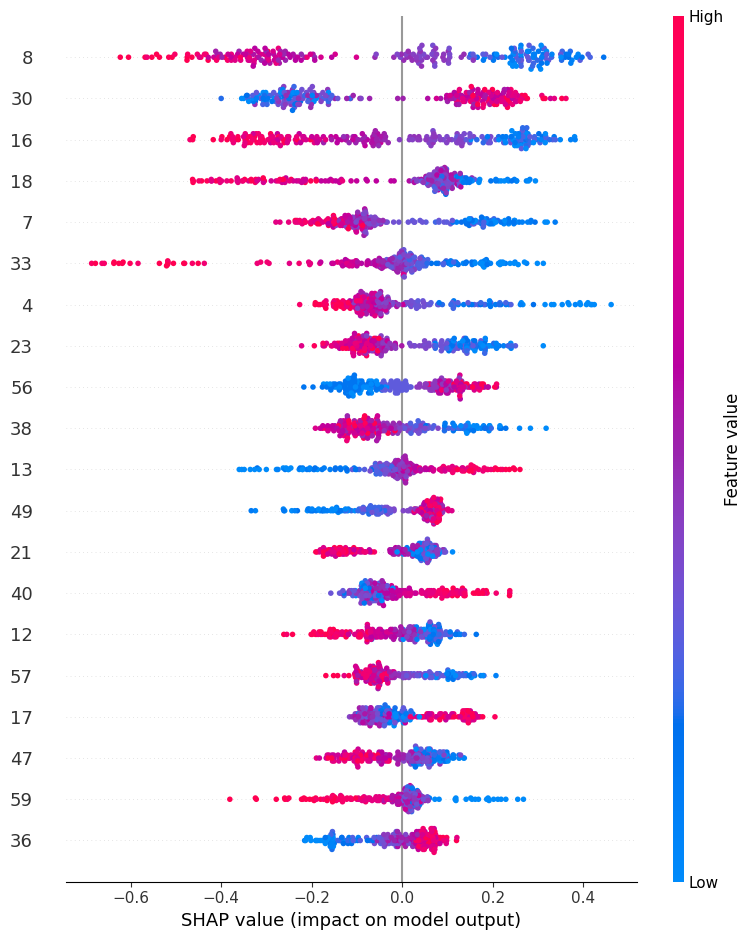

In [54]:
import shap
import matplotlib.pyplot as plt

# Load SHAP explainer
explainer_sex = shap.Explainer(best_sex_grid)
shap_values_sex = explainer_sex(X_test_sex)

# SHAP summary plot for Sex model
shap.summary_plot(shap_values_sex, X_test_sex, max_display=20)


## ADHD-in-females classifier pipeline

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [59]:
BASE_PATH = "/kaggle/input/widsdatathon2025/TRAIN_NEW"

targets = pd.read_excel(f"{BASE_PATH}/TRAINING_SOLUTIONS.xlsx")
fmri = pd.read_csv(f"{BASE_PATH}/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
categorical = pd.read_excel(f"{BASE_PATH}/TRAIN_CATEGORICAL_METADATA_new.xlsx")
quantitative = pd.read_excel(f"{BASE_PATH}/TRAIN_QUANTITATIVE_METADATA_new.xlsx")


In [60]:
df = targets.merge(fmri, on="participant_id") \
            .merge(categorical, on="participant_id") \
            .merge(quantitative, on="participant_id")

# Save column groups
fmri_cols = fmri.columns[1:]
quant_cols = quantitative.columns[1:]
cat_cols = categorical.columns[1:]

# Impute numeric (quantitative + categorical)
quant_imputer = SimpleImputer(strategy="median")
df[quant_cols] = quant_imputer.fit_transform(df[quant_cols])
df[cat_cols] = quant_imputer.fit_transform(df[cat_cols])

# One-hot encode categorical
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [62]:
# Ensure all column names in combo are strings
combo.columns = combo.columns.astype(str)

# Now fit SelectKBest
combo_kbest = skb.fit_transform(combo, df_encoded['ADHD_Outcome'])

# Build final X_C with proper indexing
X_C = pd.DataFrame(combo_kbest, index=combo.index)


In [67]:
# Combine PCA + metadata
meta_cols = [col for col in df_encoded.columns if col not in list(fmri_cols) + ['participant_id', 'ADHD_Outcome', 'Sex_F']]
combo = pd.concat([pca_df, df_encoded[meta_cols]], axis=1)

combo.columns = combo.columns.astype(str)

# SelectKBest
skb = SelectKBest(score_func=mutual_info_classif, k=100)
combo_kbest = skb.fit_transform(combo, df_encoded['ADHD_Outcome'])

X_C = pd.DataFrame(combo_kbest, index=combo.index)

# Target (safe copy and assignment)
y = df_encoded[['ADHD_Outcome', 'Sex_F']].copy()
y['ADHD_in_female'] = ((y['ADHD_Outcome'] == 1) & (y['Sex_F'] == 1)).astype(int)



In [68]:
X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(
    X_C, y['ADHD_in_female'], test_size=0.2, stratify=y['ADHD_in_female'], random_state=42
)

af_weight = y_train_af.value_counts()[0] / y_train_af.value_counts()[1]

xgb_af = XGBClassifier(
    scale_pos_weight=af_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_af.fit(X_train_af, y_train_af)
y_pred_af = xgb_af.predict(X_test_af)

print(classification_report(y_test_af, y_pred_af))


              precision    recall  f1-score   support

           0       0.81      0.91      0.86       193
           1       0.37      0.20      0.26        50

    accuracy                           0.77       243
   macro avg       0.59      0.56      0.56       243
weighted avg       0.72      0.77      0.74       243



Threshold Tuning

In [69]:
y_pred_proba = xgb_af.predict_proba(X_test_af)[:, 1]
y_pred_thresh = (y_pred_proba > 0.3).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test_af, y_pred_thresh))


              precision    recall  f1-score   support

           0       0.84      0.87      0.85       193
           1       0.42      0.38      0.40        50

    accuracy                           0.77       243
   macro avg       0.63      0.62      0.63       243
weighted avg       0.76      0.77      0.76       243



In [40]:
# --- Libraries ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# -----------------------------
# STEP 1: Load TRAIN_NEW data
# -----------------------------
BASE_PATH = "/kaggle/input/widsdatathon2025/TRAIN_NEW"

targets = pd.read_excel(f"{BASE_PATH}/TRAINING_SOLUTIONS.xlsx")
fmri = pd.read_csv(f"{BASE_PATH}/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
categorical = pd.read_excel(f"{BASE_PATH}/TRAIN_CATEGORICAL_METADATA_new.xlsx")
quantitative = pd.read_excel(f"{BASE_PATH}/TRAIN_QUANTITATIVE_METADATA_new.xlsx")

# -----------------------------
# STEP 2: Merge into single DataFrame
# -----------------------------
df = targets.merge(fmri, on="participant_id") \
            .merge(categorical, on="participant_id") \
            .merge(quantitative, on="participant_id")

# --- Save column references ---
fmri_cols = fmri.columns.drop("participant_id")
quant_cols = quantitative.columns.drop("participant_id")
cat_cols = categorical.columns.drop("participant_id")

# -----------------------------
# STEP 3: Impute Missing Values
# -----------------------------
quant_imputer = SimpleImputer(strategy="median")
df[quant_cols] = quant_imputer.fit_transform(df[quant_cols])

cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# -----------------------------
# STEP 4: One-Hot Encoding
# -----------------------------
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# -----------------------------
# STEP 5: PCA on fMRI features
# -----------------------------
scaler = StandardScaler()
fmri_scaled = scaler.fit_transform(df_encoded[fmri_cols])

pca = PCA(n_components=100, random_state=42)
fmri_pca = pca.fit_transform(fmri_scaled)
pca_df = pd.DataFrame(fmri_pca, index=df_encoded.index, columns=[f"PC_{i}" for i in range(100)])

# -----------------------------
# STEP 6: SelectKBest on combined features
# -----------------------------
meta_cols = [col for col in df_encoded.columns if col not in list(fmri_cols) + ['participant_id', 'ADHD_Outcome', 'Sex_F']]
combo = pd.concat([pca_df, df_encoded[meta_cols]], axis=1)
combo.columns = combo.columns.astype(str)  # Avoid sklearn type error

skb = SelectKBest(score_func=mutual_info_classif, k=100)
combo_kbest = skb.fit_transform(combo, df_encoded['ADHD_Outcome'])
X_C = pd.DataFrame(combo_kbest, index=combo.index)

# -----------------------------
# STEP 7: Create Target (ADHD in Female)
# -----------------------------
y = df_encoded[['ADHD_Outcome', 'Sex_F']].copy()
y['ADHD_in_female'] = ((y['ADHD_Outcome'] == 1) & (y['Sex_F'] == 1)).astype(int)

# -----------------------------
# STEP 8: Train/Test Split
# -----------------------------
X_train_af, X_test_af, y_train_af, y_test_af = train_test_split(
    X_C, y['ADHD_in_female'], test_size=0.2, stratify=y['ADHD_in_female'], random_state=42
)

# -----------------------------
# STEP 9: Train XGBoost Model
# -----------------------------
af_weight = y_train_af.value_counts()[0] / y_train_af.value_counts()[1]

xgb_af = XGBClassifier(
    scale_pos_weight=af_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_af.fit(X_train_af, y_train_af)

# -----------------------------
# STEP 10: Evaluate with Threshold Tuning
# -----------------------------
y_proba = xgb_af.predict_proba(X_test_af)[:, 1]
threshold = 0.3
y_pred_thresh = (y_proba > threshold).astype(int)

print(f"\n📊 ADHD-in-Female Classification Report (Threshold = {threshold}):")
print(classification_report(y_test_af, y_pred_thresh))


KeyboardInterrupt: 

In [7]:
import joblib

# Save all preprocessing objects and model
joblib.dump(quant_imputer, "quant_imputer.pkl")
joblib.dump(cat_imputer, "cat_imputer.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(pca, "pca.pkl")
joblib.dump(skb, "selectkbest.pkl")
joblib.dump(xgb_af, "xgb_af_model.pkl")

# Also save these reference lists to ensure consistent test-time alignment
joblib.dump(fmri_cols, "fmri_cols.pkl")
joblib.dump(meta_cols, "meta_cols.pkl")
joblib.dump(combo.columns.tolist(), "combo_column_names.pkl")  # For feature order match


['combo_column_names.pkl']

### Testing on Train old

In [9]:
import pandas as pd
import numpy as np
import joblib

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest

# Load saved objects
quant_imputer = joblib.load("quant_imputer.pkl")
cat_imputer = joblib.load("cat_imputer.pkl")
scaler = joblib.load("scaler.pkl")
pca = joblib.load("pca.pkl")
skb = joblib.load("selectkbest.pkl")
xgb_af = joblib.load("xgb_af_model.pkl")

fmri_cols = joblib.load("fmri_cols.pkl")
meta_cols = joblib.load("meta_cols.pkl")
combo_columns = joblib.load("combo_column_names.pkl")


In [10]:
OLD_PATH = "/kaggle/input/widsdatathon2025/TRAIN_OLD"

# Load datasets
fmri_old = pd.read_csv(f"{OLD_PATH}/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")
categorical_old = pd.read_excel(f"{OLD_PATH}/TRAIN_CATEGORICAL_METADATA.xlsx")
quantitative_old = pd.read_excel(f"{OLD_PATH}/TRAIN_QUANTITATIVE_METADATA.xlsx")
targets_old = pd.read_excel(f"{OLD_PATH}/TRAINING_SOLUTIONS.xlsx")

# Merge
df_old = targets_old.merge(fmri_old, on="participant_id") \
                    .merge(categorical_old, on="participant_id") \
                    .merge(quantitative_old, on="participant_id")


In [13]:
# Apply imputers
quant_cols = quantitative_old.columns.drop("participant_id")
cat_cols = categorical_old.columns.drop("participant_id")

df_old[quant_cols] = quant_imputer.transform(df_old[quant_cols])
df_old[cat_cols] = cat_imputer.transform(df_old[cat_cols])

# One-hot encode
df_old_encoded = pd.get_dummies(df_old, columns=cat_cols, drop_first=True)

# Identify missing columns
missing_cols = [col for col in combo_columns if col not in df_old_encoded.columns]

# Create a single DataFrame of those columns filled with 0
missing_df = pd.DataFrame(0, index=df_old_encoded.index, columns=missing_cols)

# Concatenate efficiently
df_old_encoded = pd.concat([df_old_encoded, missing_df], axis=1)

# Reorder to match expected column order
df_old_encoded = df_old_encoded[combo_columns]



In [16]:
# Step 1: Extract fMRI from raw df_old
fmri_old = df_old[fmri_cols]

# Step 2: PCA pipeline
fmri_old_scaled = scaler.transform(fmri_old)
fmri_old_pca = pca.transform(fmri_old_scaled)
pca_old_df = pd.DataFrame(fmri_old_pca, index=df_old.index)
pca_old_df.columns = [f"PC_{i}" for i in range(pca_old_df.shape[1])]  # <-- FIX HERE

# Step 3: Add aligned metadata
meta_old = df_old_encoded[meta_cols]

# Step 4: Combine and SelectKBest
combo_old = pd.concat([pca_old_df, meta_old], axis=1)
combo_old.columns = combo_old.columns.astype(str)

# Apply SelectKBest
combo_old_kbest = skb.transform(combo_old)
X_old_final = pd.DataFrame(combo_old_kbest, index=combo_old.index)


In [17]:
# Define target
y_old = df_old[['ADHD_Outcome', 'Sex_F']].copy()
y_old['ADHD_in_female'] = ((y_old['ADHD_Outcome'] == 1) & (y_old['Sex_F'] == 1)).astype(int)

# Predict
y_old_proba = xgb_af.predict_proba(X_old_final)[:, 1]
y_old_pred_thresh = (y_old_proba > 0.3).astype(int)

# Evaluate
from sklearn.metrics import classification_report
print("📊 Evaluation on TRAIN_OLD using TRAIN_NEW model (Threshold = 0.3):")
print(classification_report(y_old['ADHD_in_female'], y_old_pred_thresh))


📊 Evaluation on TRAIN_OLD using TRAIN_NEW model (Threshold = 0.3):
              precision    recall  f1-score   support

           0       0.87      0.53      0.66       963
           1       0.28      0.70      0.40       250

    accuracy                           0.56      1213
   macro avg       0.57      0.61      0.53      1213
weighted avg       0.75      0.56      0.60      1213



# Test

In [23]:
import pandas as pd
import numpy as np
import joblib

# === Load saved objects === #
quant_imputer = joblib.load("quant_imputer.pkl")
cat_imputer = joblib.load("cat_imputer.pkl")
scaler = joblib.load("scaler.pkl")
pca = joblib.load("pca.pkl")
skb = joblib.load("selectkbest.pkl")
xgb_af = joblib.load("xgb_af_model.pkl")

fmri_cols = joblib.load("fmri_cols.pkl")
meta_cols = joblib.load("meta_cols.pkl")
combo_columns = joblib.load("combo_column_names.pkl")  # Final combo column names

# === Load TEST set === #
TEST_PATH = "/kaggle/input/widsdatathon2025/TEST"
fmri_test = pd.read_csv(f"{TEST_PATH}/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
cat_test = pd.read_excel(f"{TEST_PATH}/TEST_CATEGORICAL.xlsx")
quant_test = pd.read_excel(f"{TEST_PATH}/TEST_QUANTITATIVE_METADATA.xlsx")

# Merge all parts
df_test = fmri_test.merge(cat_test, on="participant_id").merge(quant_test, on="participant_id")
participant_ids = df_test["participant_id"]  # Save for submission

# --- Extract fMRI features before any processing --- #
fmri_test_raw = df_test[fmri_cols]

# --- Impute categorical + quantitative --- #
df_test[quant_test.columns[1:]] = quant_imputer.transform(df_test[quant_test.columns[1:]])
df_test[cat_test.columns[1:]] = cat_imputer.transform(df_test[cat_test.columns[1:]])

# --- One-hot encode and align --- #
df_test_encoded = pd.get_dummies(df_test, columns=cat_test.columns[1:], drop_first=True)

# Add any missing columns
missing_cols = set(combo_columns) - set(df_test_encoded.columns)
df_test_encoded = pd.concat(
    [df_test_encoded, pd.DataFrame(0, index=df_test_encoded.index, columns=list(missing_cols))],
    axis=1
)


# Align column order to match training
df_test_encoded = df_test_encoded[combo_columns]

# --- Process fMRI: Scale → PCA --- #
fmri_test_scaled = scaler.transform(fmri_test_raw)
fmri_test_pca = pca.transform(fmri_test_scaled)
pca_test_df = pd.DataFrame(fmri_test_pca, index=df_test_encoded.index, columns=[f"PC_{i}" for i in range(fmri_test_pca.shape[1])])

# --- Combine with meta features --- #
meta_test = df_test_encoded[meta_cols]
combo_test = pd.concat([pca_test_df, meta_test], axis=1)
combo_test.columns = combo_test.columns.astype(str)

# --- Apply SelectKBest --- #
combo_test_kbest = skb.transform(combo_test)
X_test_final = pd.DataFrame(combo_test_kbest, index=combo_test.index)

# --- Predict using tuned threshold --- #
y_test_proba = xgb_af.predict_proba(X_test_final)[:, 1]
y_test_pred = (y_test_proba > 0.3).astype(int)

# --- Final Submission --- #
submission = pd.DataFrame({
    "participant_id": participant_ids,
    "ADHD_in_female_predicted": y_test_pred
})

submission.to_csv("adhd_in_females_submission.csv", index=False)
print("✅ Submission saved: adhd_in_females_submission.csv")


✅ Submission saved: adhd_in_females_submission.csv


In [24]:
submission.heaad(10)


,participant_id,ADHD_in_female_predicted
0,Cfwaf5FX7jWK,0
1,vhGrzmvA3Hjq,1
2,ULliyEXjy4OV,0
3,LZfeAb1xMtql,0
4,EnFOUv0YK1RG,1
5,3VbkvJ22j9Fu,0
6,PRKZcnOgqcuk,0
7,DuVUuyMZi5qV,0
8,uM4etVLZrgMg,0
9,BpzyExrET5ta,0


In [31]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib

# Make sure X_C and y are already defined (from your TRAIN_NEW pipeline)
# We'll reuse them here

# Target for sex classification
y_sex = y['Sex_F']

# Train/test split
X_train_sex, X_val_sex, y_train_sex, y_val_sex = train_test_split(
    X_C, y_sex, test_size=0.2, stratify=y_sex, random_state=42
)

# Handle class imbalance
sex_weight = y_train_sex.value_counts()[0] / y_train_sex.value_counts()[1]

# Train XGBoost
xgb_sex = XGBClassifier(
    scale_pos_weight=sex_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_sex.fit(X_train_sex, y_train_sex)

# Evaluate
y_val_pred = xgb_sex.predict(X_val_sex)
print("📊 Validation Performance for Sex_F:")
print(classification_report(y_val_sex, y_val_pred))

# Save model
joblib.dump(xgb_sex, "xgb_sex_model.pkl")
print("✅ Saved as: xgb_sex_model.pkl")


📊 Validation Performance for Sex_F:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       160
           1       0.49      0.33      0.39        83

    accuracy                           0.65       243
   macro avg       0.60      0.58      0.57       243
weighted avg       0.63      0.65      0.63       243

✅ Saved as: xgb_sex_model.pkl


In [41]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# --------------------
# STEP 1: Load Test Data
# --------------------
TEST_PATH = "/kaggle/input/widsdatathon2025/TEST"

fmri_test = pd.read_csv(f"{TEST_PATH}/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
cat_test = pd.read_excel(f"{TEST_PATH}/TEST_CATEGORICAL.xlsx")
quant_test = pd.read_excel(f"{TEST_PATH}/TEST_QUANTITATIVE_METADATA.xlsx")

df_test = fmri_test.merge(cat_test, on="participant_id").merge(quant_test, on="participant_id")
participant_ids = df_test['participant_id']

# --------------------
# STEP 2: Load Saved Objects
# --------------------
quant_imputer = joblib.load("quant_imputer.pkl")
cat_imputer = joblib.load("cat_imputer.pkl")
scaler = joblib.load("scaler.pkl")
pca = joblib.load("pca.pkl")
skb = joblib.load("selectkbest.pkl")
xgb_adhd = joblib.load("xgb_af_model.pkl")  # ADHD outcome
xgb_sex = joblib.load("xgb_sex_model.pkl")  # Sex prediction

fmri_cols = joblib.load("fmri_cols.pkl")
meta_cols = joblib.load("meta_cols.pkl")
combo_columns = joblib.load("combo_column_names.pkl")

# --------------------
# STEP 3: Impute Quant + Cat
# --------------------
quant_cols = quant_test.columns.drop("participant_id")
cat_cols = cat_test.columns.drop("participant_id")

df_test[quant_cols] = quant_imputer.transform(df_test[quant_cols])
df_test[cat_cols] = cat_imputer.transform(df_test[cat_cols])

# --------------------
# STEP 4: One-Hot Encode Categorical Columns
# --------------------
df_test_encoded = pd.get_dummies(df_test, columns=cat_cols, drop_first=True)

# --------------------
# STEP 5: Align Columns (Handle Missing)
# --------------------
missing_cols = list(set(combo_columns) - set(df_test_encoded.columns))
zeros_df = pd.DataFrame(0, index=df_test_encoded.index, columns=missing_cols)
df_test_encoded = pd.concat([df_test_encoded, zeros_df], axis=1)

# Final column alignment
df_test_encoded = df_test_encoded[combo_columns]

# --------------------
# STEP 6: fMRI ➝ PCA
# --------------------
fmri_test_scaled = scaler.transform(df_test[fmri_cols])
fmri_test_pca = pca.transform(fmri_test_scaled)
pca_test_df = pd.DataFrame(fmri_test_pca, index=df_test.index, columns=[f"PC_{i}" for i in range(pca.n_components_)])

# --------------------
# STEP 7: Combine PCA + Meta ➝ SelectKBest
# --------------------
meta_test = df_test_encoded[meta_cols]
combo_test = pd.concat([pca_test_df, meta_test], axis=1)
combo_test.columns = combo_test.columns.astype(str)

combo_test_kbest = skb.transform(combo_test)
X_test_final = pd.DataFrame(combo_test_kbest, index=combo_test.index)

# --------------------
# STEP 8: Predict ADHD and Sex
# --------------------
y_pred_adhd_prob = xgb_adhd.predict_proba(X_test_final)[:, 1]
y_pred_adhd = (y_pred_adhd_prob > 0.3).astype(int)  # threshold tuned at 0.3

y_pred_sex = xgb_sex.predict(X_test_final)

# --------------------
# STEP 9: Build Submission
# --------------------
submission = pd.DataFrame({
    "participant_id": participant_ids,
    "Sex_F": y_pred_sex,
    "ADHD_Outcome": y_pred_adhd
})

submission.to_csv("submission.csv", index=False)
print("✅ Submission saved as 'submission.csv'")


✅ Submission saved as 'submission.csv'


In [37]:
submission.head(10)


,participant_id,Sex_F,ADHD_Outcome
0,Cfwaf5FX7jWK,1,0
1,vhGrzmvA3Hjq,1,1
2,ULliyEXjy4OV,1,0
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,0,1
5,3VbkvJ22j9Fu,0,0
6,PRKZcnOgqcuk,0,0
7,DuVUuyMZi5qV,1,0
8,uM4etVLZrgMg,0,0
9,BpzyExrET5ta,1,0
